
# Model Explainability — Customer Churn Prediction

**Objective:**  
Explain and interpret the **Random Forest model** used for churn prediction.      

In [10]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
    

In [11]:
# Load data and model
X_train = pd.read_csv('../data/processed/X_train_res.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

best_model = joblib.load('../models/best_model.pkl')
print("✅ Model loaded successfully:", type(best_model).__name__)
    

✅ Model loaded successfully: RandomForestClassifier


Top 10 Important Features:


,Feature,Importance
4,tenure,0.087855
8,totalcharges,0.084290
7,monthlycharges,0.068152
7068,contract_two year,0.035202
7053,internetservice_fiber optic,0.033342
7070,paymentmethod_electronic check,0.030551
7067,contract_one year,0.019665
7056,onlinesecurity_yes,0.017815
7062,techsupport_yes,0.017538
3,dependents,0.016895


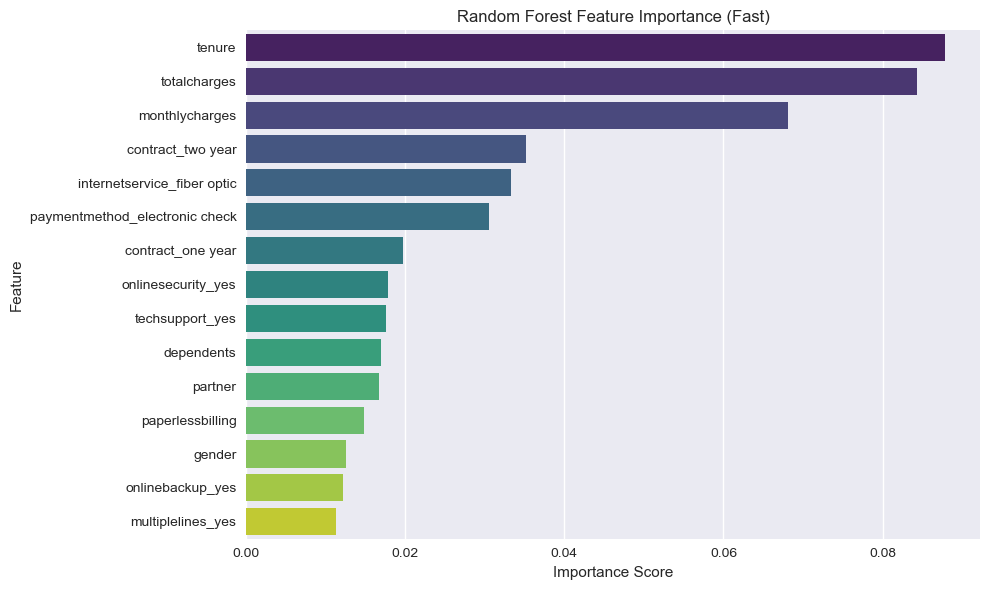

✅ Feature importance chart and CSV saved successfully!


In [13]:
# Random Forest Model
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 10 Important Features:")
display(importance_df.head(10))

# Plot top 15 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(y='Feature', x='Importance', data=importance_df.head(15), palette='viridis')
plt.title('Random Forest Feature Importance (Fast)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('../reports/figures/feature_importance_rf.png', dpi=200, bbox_inches='tight')
plt.show()

# Save importance table for dashboard/reporting
importance_df.to_csv('../reports/feature_importance_rf.csv', index=False)
print("✅ Feature importance chart and CSV saved successfully!")
    


### Business Interpretation


* Tenure - Customers with long tenure are less likely to churn  
* MonthlyCharges - High-cost customers tend to churn more  
* Contract_two year - Long contracts reduce churn likelihood  
* PaymentMethod_electronic check - E-check users have higher churn risk  
* InternetService_fiber optic - Fiber users may leave due to cost or service quality  

**Conclusion:**  
The Random Forest model confirms churn is most influenced by tenure, contract length, and billing factors.  
These insights directly guide retention and marketing strategies.
    